In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Specify the file path in Google Drive
file_path = '/content/drive/My Drive/CaseStudy_1/SDB_data_raw.xlsx'  # Replace 'your_file.csv' with the actual file name

# Load the CSV file into a DataFrame
df = pd.read_excel(file_path)

# Display the DataFrame
df.head()

Mounted at /content/drive


,Old_School,Curr_School,Sex,Special_Ed,Disability,Fed_Race,Eng_Prof,FA18_19MathRIT,FA18_19ReadRIT,WT18_19MathRIT,...,Q4_1,Q4_2,Q4_4,Q5_1,Q6_1,Q6_3,Q6_4,Q6_5,Q6_7,Q6_8
0,CONVERSE ELEMENTARY SCHOOL,MCNEEL INTERMEDIATE SCHOOL,M,Y,Other Health Impairment,American Indian or Alaskan Native,1-Beginning/Preproduction,132,179,176,...,A,A,G,B,C,E,D,D,C,D
1,GASTON ELEMENTARY SCHOOL,CUNNINGHAM INTERMEDIATE SCHOOL,F,N,0,American Indian or Alaskan Native,1-Beginning/Preproduction,180,191,189,...,NaN,B,E,B,F,C,C,B,B,A
2,HACKETT ELEMENTARY SCHOOL,MCNEEL INTERMEDIATE SCHOOL,F,N,0,White,1-Beginning/Preproduction,202,202,207,...,A,A,D,B,F,C,D,E,C,C
3,HACKETT ELEMENTARY SCHOOL,MCNEEL INTERMEDIATE SCHOOL,F,Y,Speech & Language,American Indian or Alaskan Native,1-Beginning/Preproduction,191,194,189,...,B,F,E,B,F,B,D,B,D,D
4,ROBINSON ELEMENTARY SCHOOL,ALDRICH INTERMEDIATE SCHOOL,F,N,0,American Indian or Alaskan Native,1-Beginning/Preproduction,197,207,0,...,A,A,F,B,F,B,C,B,C,E


In [ ]:
# Display the first few rows
df.head()

# Summary statistics and data types
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Old_School      213 non-null    object 
 1   Curr_School     213 non-null    object 
 2   Sex             213 non-null    object 
 3   Special_Ed      213 non-null    object 
 4   Disability      212 non-null    object 
 5   Fed_Race        213 non-null    object 
 6   Eng_Prof        213 non-null    object 
 7   FA18_19MathRIT  213 non-null    int64  
 8   FA18_19ReadRIT  213 non-null    int64  
 9   WT18_19MathRIT  213 non-null    int64  
 10  WT18_19ReadRIT  213 non-null    int64  
 11  Q1_3            213 non-null    object 
 12  Q1_7            210 non-null    object 
 13  Q2_1            210 non-null    float64
 14  Q2_2            211 non-null    float64
 15  Q2_3            213 non-null    object 
 16  Q2_5            206 non-null    object 
 17  Q3_1            213 non-null    obj

,FA18_19MathRIT,FA18_19ReadRIT,WT18_19MathRIT,WT18_19ReadRIT,Q2_1,Q2_2
count,213.000000,213.000000,213.000000,213.000000,210.000000,211.000000
mean,193.474178,185.023474,181.187793,155.633803,2.142857,2.753555
std,33.122209,44.662407,63.774532,83.022770,0.916918,1.221211
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,188.000000,183.000000,190.000000,166.000000,2.000000,2.000000
50%,198.000000,195.000000,203.000000,195.000000,2.000000,3.000000
75%,208.000000,205.000000,210.000000,208.000000,2.000000,3.000000
max,240.000000,224.000000,243.000000,232.000000,7.000000,7.000000


In [ ]:
# Converting english proficiency to numerical data
# Replace NaN values in 'Eng_Prof' with an empty string
df['Eng_Prof'] = df['Eng_Prof'].fillna('').astype(str)

# Extract the first character and convert to integer, handling potential errors
df['Eng_Prof'] = pd.to_numeric(df['Eng_Prof'].str[0], errors='coerce').astype('Int64')

print(df['Eng_Prof'])

0      1
1      1
2      1
3      1
4      1
      ..
208    7
209    7
210    7
211    7
212    7
Name: Eng_Prof, Length: 213, dtype: Int64


In [ ]:
# Calculate the mean for Math and Read columns
df['Math 18-19'] = df[['FA18_19MathRIT', 'WT18_19MathRIT']].mean(axis=1)
df['Read 18-19'] = df[['FA18_19ReadRIT', 'WT18_19ReadRIT']].mean(axis=1)

# Drop the original columns
df = df.drop(columns=['FA18_19MathRIT', 'FA18_19ReadRIT', 'WT18_19MathRIT', 'WT18_19ReadRIT'])

# Display the resulting DataFrame
df

,Old_School,Curr_School,Sex,Special_Ed,Disability,Fed_Race,Eng_Prof,Q1_3,Q1_7,Q2_1,...,Q4_4,Q5_1,Q6_1,Q6_3,Q6_4,Q6_5,Q6_7,Q6_8,Math 18-19,Read 18-19
0,CONVERSE ELEMENTARY SCHOOL,MCNEEL INTERMEDIATE SCHOOL,M,Y,Other Health Impairment,American Indian or Alaskan Native,1,D,A,4.0,...,G,B,C,E,D,D,C,D,154.0,166.0
1,GASTON ELEMENTARY SCHOOL,CUNNINGHAM INTERMEDIATE SCHOOL,F,N,0,American Indian or Alaskan Native,1,D,A,2.0,...,E,B,F,C,C,B,B,A,184.5,190.5
2,HACKETT ELEMENTARY SCHOOL,MCNEEL INTERMEDIATE SCHOOL,F,N,0,White,1,E,B,2.0,...,D,B,F,C,D,E,C,C,204.5,202.0
3,HACKETT ELEMENTARY SCHOOL,MCNEEL INTERMEDIATE SCHOOL,F,Y,Speech & Language,American Indian or Alaskan Native,1,D,A,1.0,...,E,B,F,B,D,B,D,D,190.0,195.5
4,ROBINSON ELEMENTARY SCHOOL,ALDRICH INTERMEDIATE SCHOOL,F,N,0,American Indian or Alaskan Native,1,E,A,2.0,...,F,B,F,B,C,B,C,E,98.5,103.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,TODD ELEMENTARY SCHOOL,FRUZEN INTERMEDIATE SCHOOL,M,N,Speech & Language,White,7,E,D,2.0,...,D,A,F,B,C,C,C,D,197.5,180.5
209,TODD ELEMENTARY SCHOOL,FRUZEN INTERMEDIATE SCHOOL,M,Y,EMOTIONAL BEHAVIORAL DISABILITY,Black or African American,7,D,NaN,NaN,...,E,B,F,A,C,A,A,NaN,206.5,200.5
210,TODD ELEMENTARY SCHOOL,MCNEEL INTERMEDIATE SCHOOL,F,N,Speech & Language,White,7,E,D,3.0,...,E,B,G,D,D,F,C,D,212.0,203.5
211,Other,CUNNINGHAM INTERMEDIATE SCHOOL,M,Y,Traumatic Brain Injury,Black or African American,7,F,A,3.0,...,A,B,F,A,D,E,A,A,78.5,75.0


In [ ]:
#Converting the M/F column into 1 and 0 resectively
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
print(df['Sex'])


0      1
1      0
2      0
3      0
4      0
      ..
208    1
209    1
210    0
211    1
212    1
Name: Sex, Length: 213, dtype: int64


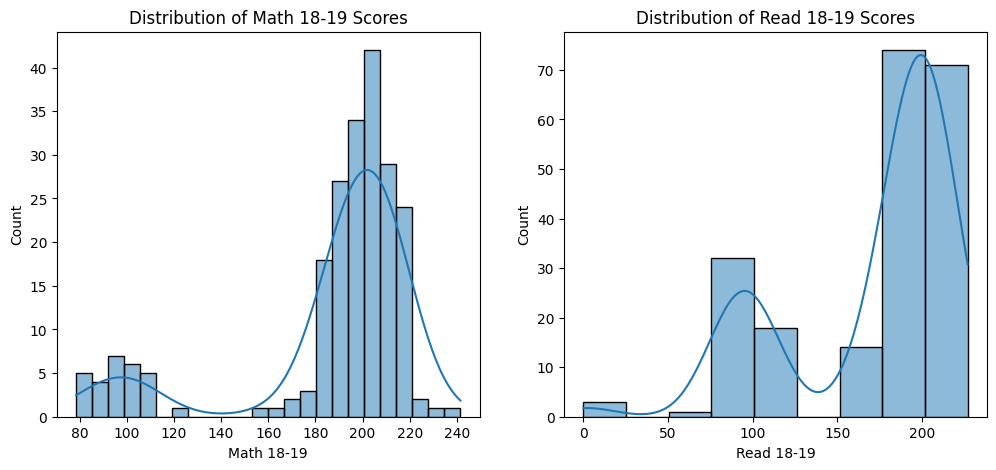

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Math 18-19'], kde=True)
plt.title('Distribution of Math 18-19 Scores')

plt.subplot(1, 2, 2)
sns.histplot(df['Read 18-19'], kde=True)
plt.title('Distribution of Read 18-19 Scores')

plt.show()

<Figure size 1000x600 with 0 Axes>

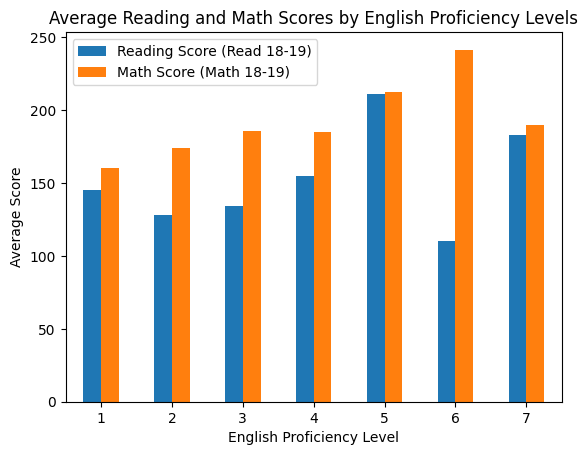

In [ ]:
avg_scores = df.groupby('Eng_Prof')[['Read 18-19', 'Math 18-19']].mean().reset_index()

plt.figure(figsize=(10, 6))
avg_scores.plot(kind='bar', x='Eng_Prof', stacked=False)
plt.title('Average Reading and Math Scores by English Proficiency Levels')
plt.xlabel('English Proficiency Level')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(['Reading Score (Read 18-19)', 'Math Score (Math 18-19)'])
plt.show()

In [ ]:
# Define the numerical mapping for Special_Ed
Special_Ed_numerical_mapping = {
    'N': 0,  # True
    'Y': 1,  # False
}
# Replace values with the mapping
df['Special_Ed'] = df['Special_Ed'].replace(Special_Ed_numerical_mapping)

# Fill NaNs with the median value of Special_Ed
df['Special_Ed'] = df['Special_Ed'].fillna(round(df['Special_Ed'].median()))

# Convert to integer type
df['Special_Ed'] = df['Special_Ed'].astype(int)

# Display unique values to confirm
unique_values_Special_Ed= df['Special_Ed'].unique()
print("Unique values in Special_Ed:", unique_values_Special_Ed)

Unique values in Special_Ed: [1 0]


<ipython-input-10-67b29ce0794f>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Special_Ed'] = df['Special_Ed'].replace(Special_Ed_numerical_mapping)


In [ ]:
# Define the numerical mapping for Q1_3
q1_3_numerical_mapping = {
    'A': 1,  # Very poor
    'B': 2,  # Poor
    'C': 3,  # Average
    'D': 4,  # Good
    'E': 5,  # Very good
    'F': 6,  # Other
}

# Apply the numerical mapping and explicitly convert the column to integer type
df['Q1_3'] = df['Q1_3'].replace(q1_3_numerical_mapping).astype(int)

# Display unique values in Q1_3 to confirm
unique_values = df['Q1_3'].unique()
print("Unique values in Q1_3:", unique_values)

Unique values in Q1_3: [4 5 3 6 2 1]


<ipython-input-11-1acc9b4692db>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q1_3'] = df['Q1_3'].replace(q1_3_numerical_mapping).astype(int)


In [ ]:
# Define the numerical mapping for Q1_7
q1_7_numerical_mapping = {
    'A': 0,  # 0 times
    'B': 1,  # 1 time
    'C': 2,  # 2 times
    'D': 3,  # 3 times
    'E': 4,  # 4 times
    'F': 5,  # 5 times
    'G': 6   # More than 5 times
}
# Replace values with the mapping
df['Q1_7'] = df['Q1_7'].replace(q1_7_numerical_mapping)

# Fill NaNs with the median value of Q1_7
df['Q1_7'] = df['Q1_7'].fillna(round(df['Q1_7'].median()))

# Convert to integer type
df['Q1_7'] = df['Q1_7'].astype(int)

# Display unique values to confirm
unique_values_q1_7 = df['Q1_7'].unique()
print("Unique values in Q1_7:", unique_values_q1_7)

Unique values in Q1_7: [0 1 2 3 5 4 6]


<ipython-input-12-cb0c21126643>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q1_7'] = df['Q1_7'].replace(q1_7_numerical_mapping)


In [ ]:
# Replace missing values in 'Disability' with 0 and rounded median for 'Q2_1' and 'Q2_2'
df.fillna({
    'Disability': 0,
    'Q2_1': round(df['Q2_1'].median()),
    'Q2_2': round(df['Q2_2'].median())
}, inplace=True)

# Verify that there are no more missing values in these columns
print("Remaining missing values:")
print(df[['Disability', 'Q2_1', 'Q2_2']].isnull().sum())

Remaining missing values:
Disability    0
Q2_1          0
Q2_2          0
dtype: int64


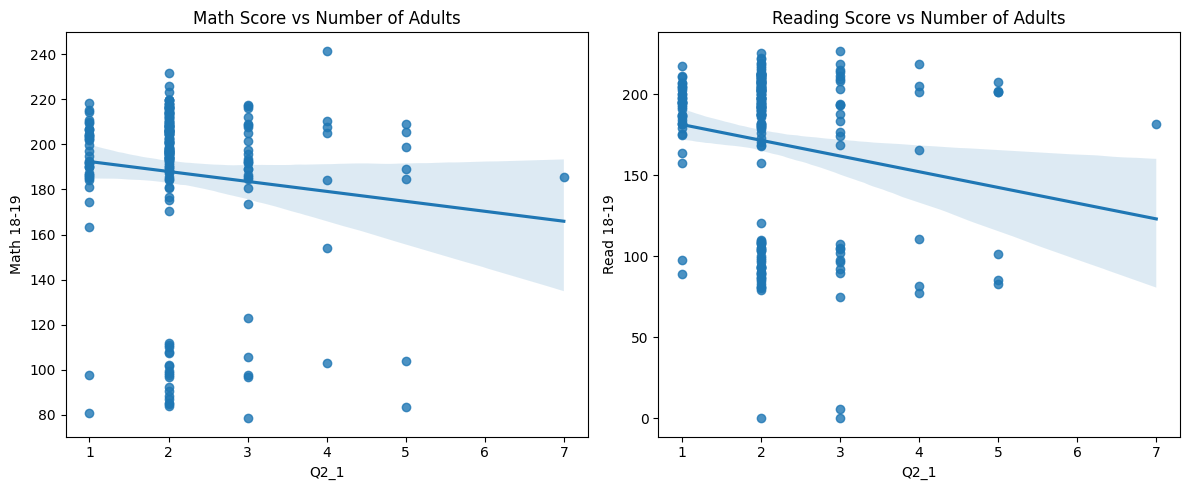

In [ ]:
plt.figure(figsize=(12, 5))

# Math Score vs Number of Adults
plt.subplot(1, 2, 1)
sns.regplot(df, x='Q2_1', y='Math 18-19')
plt.title('Math Score vs Number of Adults')

# Reading Score vs Number of Adults
plt.subplot(1, 2, 2)
sns.regplot(df, x='Q2_1', y='Read 18-19')
plt.title('Reading Score vs Number of Adults')

plt.tight_layout()
plt.show()

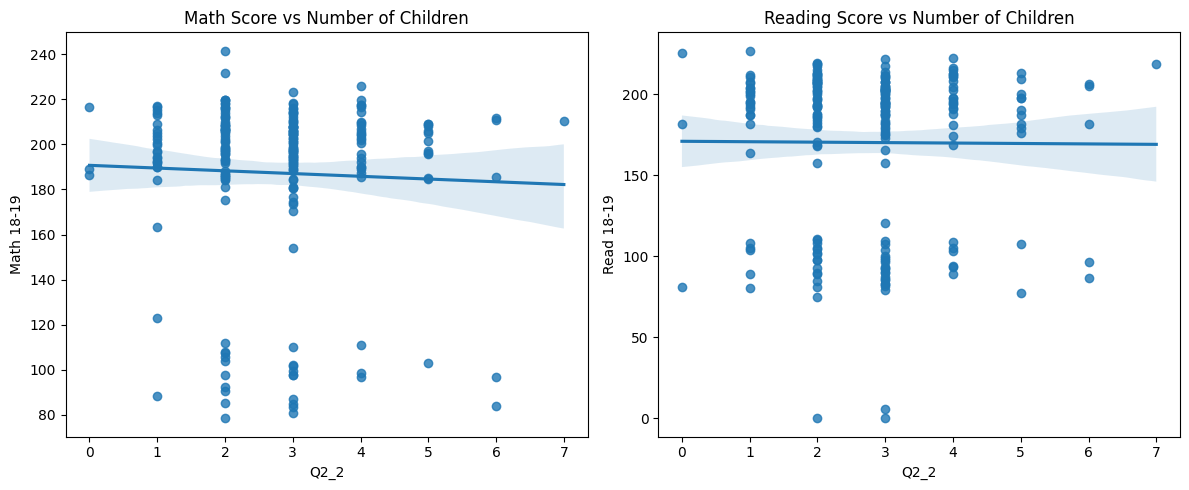

In [ ]:
plt.figure(figsize=(12, 5))

# Math Score vs Number of Adults
plt.subplot(1, 2, 1)
sns.regplot(df, x='Q2_2', y='Math 18-19')
plt.title('Math Score vs Number of Children')

# Reading Score vs Number of Adults
plt.subplot(1, 2, 2)
sns.regplot(df, x='Q2_2', y='Read 18-19')
plt.title('Reading Score vs Number of Children')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the number of children per adult ratio
df['Children_Per_Adult'] = df['Q2_2'] / df['Q2_1']

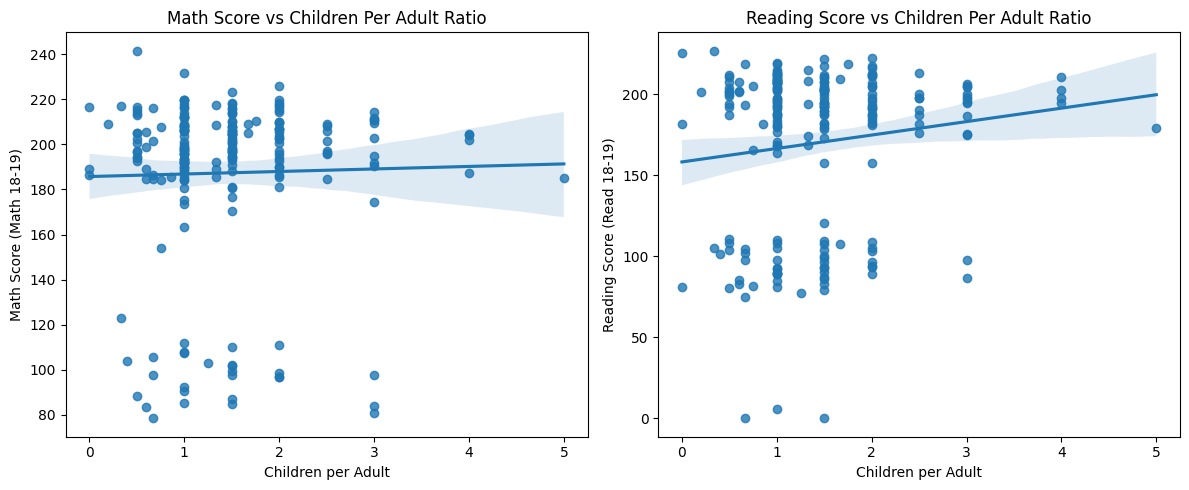

In [ ]:
plt.figure(figsize=(12, 5))

# Math Score vs Children Per Adult
plt.subplot(1, 2, 1)
sns.regplot(df, x='Children_Per_Adult', y='Math 18-19')
plt.title('Math Score vs Children Per Adult Ratio')
plt.xlabel('Children per Adult')
plt.ylabel('Math Score (Math 18-19)')

# Reading Score vs Children Per Adult
plt.subplot(1, 2, 2)
sns.regplot(df, x='Children_Per_Adult', y='Read 18-19')
plt.title('Reading Score vs Children Per Adult Ratio')
plt.xlabel('Children per Adult')
plt.ylabel('Reading Score (Read 18-19)')

plt.tight_layout()
plt.show()

In [ ]:
# Define the numerical mapping for Q2_3
q2_3_mapping = {
    'A': 0,  # Less than a year
    'B': 1,  # 1-3 years
    'C': 2,  # 4-6 years
    'D': 3,  # 7-9 years
    'E': 4   # 10 years or longer
}

# Apply the mapping to Q2_3
df['Q2_3'] = df['Q2_3'].replace(q2_3_mapping)
df['Q2_3'] = df['Q2_3'].fillna(round(df['Q2_3'].median()))

<ipython-input-18-e4d6095d4272>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q2_3'] = df['Q2_3'].replace(q2_3_mapping)


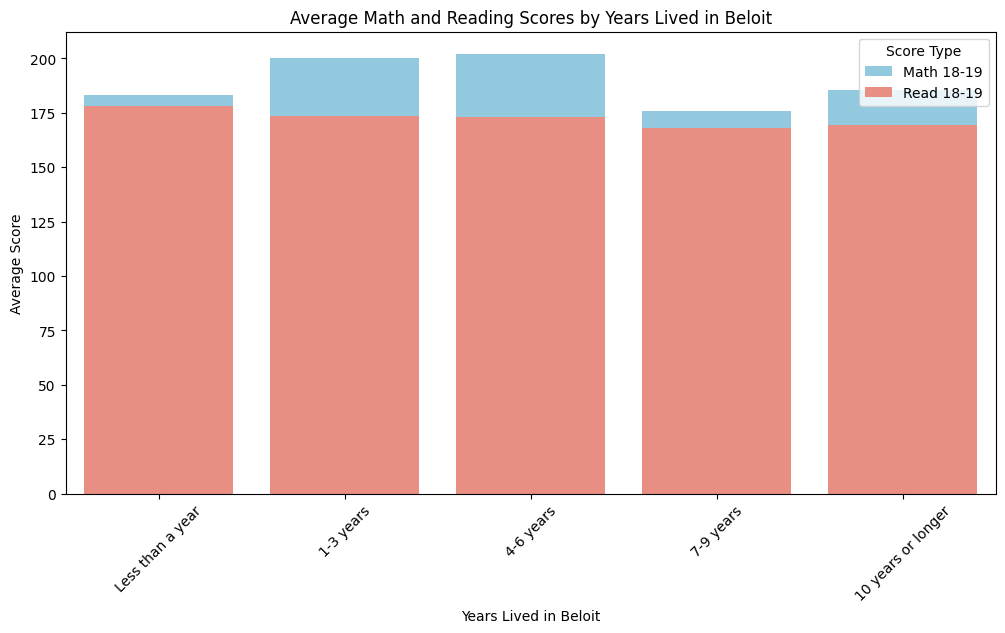

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by Q2_3 and calculate the mean scores
average_scores = df.groupby('Q2_3')[['Math 18-19', 'Read 18-19']].mean().reset_index()

# Define labels for Q2_3 categories
labels = [
    'Less than a year',
    '1-3 years',
    '4-6 years',
    '7-9 years',
    '10 years or longer'
]
average_scores['Q2_3_Label'] = labels

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=average_scores, x='Q2_3_Label', y='Math 18-19', color='skyblue', label='Math 18-19')
sns.barplot(data=average_scores, x='Q2_3_Label', y='Read 18-19', color='salmon', label='Read 18-19')

plt.title('Average Math and Reading Scores by Years Lived in Beloit')
plt.xlabel('Years Lived in Beloit')
plt.ylabel('Average Score')
plt.legend(title="Score Type")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Check unique values in Q2_3 after applying the mapping
unique_values_q2_3 = df['Q2_3'].unique()
print("Unique values in Q2_3:", unique_values_q2_3)

Unique values in Q2_3: [4 3 1 2 0]


In [ ]:
# Define the mapping for Q2_5 income categories
q2_5_mapping = {
    'A': 1,  # At or less than $22,459
    'B': 2,  # $22,460 - $30,451
    'C': 3,  # $30,452 - $38,443
    'D': 4,  # $38,444 - $46,435
    'E': 5,  # $46,436 - $54,427
    'F': 6,  # $54,428 - $62,419
    'G': 7,  # $62,420 - $70,411
    'H': 8,  # $70,412 - $78,403
    'I': 9,  # $78,404 - $86,395
    'J': 10, # $86,396 - $94,387
    'K': 11, # $94,388 - $102,379
    'L': 12, # $102,380 - $110,371
    'M': 13  # At or more than $110,372
}

In [ ]:
# Apply the mapping to Q2_5
df['Q2_5'] = df['Q2_5'].replace(q2_5_mapping)

# Fill any missing values in Q2_5 with the median
df['Q2_5'] = df['Q2_5'].fillna(round(df['Q2_5'].median()))

# Display unique values in Q2_5 to confirm
unique_values_q2_5 = df['Q2_5'].unique()
print("Unique values in Q2_5:", unique_values_q2_5)

Unique values in Q2_5: [ 5.  1.  2.  3.  9.  4.  6.  7. 13. 11.  8. 12. 10.]


<ipython-input-22-2af1a1f5fc55>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q2_5'] = df['Q2_5'].replace(q2_5_mapping)


In [ ]:
# Define the numerical mapping for Q3_1
q3_1_mapping = {
    'A': 0,  # Yes
    'B': 1,  # No, the child's biological mother lives elsewhere.
    'C': 2   # No, the child's biological mother is deceased.
}

In [ ]:
# Apply the mapping to Q3_1
df['Q3_1'] = df['Q3_1'].replace(q3_1_mapping)

# Fill any missing values in Q3_1 with the median
df['Q3_1'] = df['Q3_1'].fillna(round(df['Q3_1'].median()))

# Display unique values in Q3_1 to confirm
unique_values_q3_1 = df['Q3_1'].unique()
print("Unique values in Q3_1:", unique_values_q3_1)

Unique values in Q3_1: [0 1 2]


<ipython-input-24-8a5425ff8d1e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q3_1'] = df['Q3_1'].replace(q3_1_mapping)


In [ ]:
# Define the numerical mapping for Q3_2
q3_2_mapping = {
    'A': 0,  # Less than high school
    'B': 1,  # High school diploma or GED
    'b': 1,  # High school diploma or GED
    'C': 2,  # Some college
    'D': 3,  # Associate Degree
    'E': 4,  # Bachelor Degree
    'F': 5,  # Master Degree, PhD, JD, MD, or other advanced degree
    'G': 6   # Other
}

In [ ]:
# Apply the mapping to Q3_2
df['Q3_2'] = df['Q3_2'].replace(q3_2_mapping)

# Fill any missing values in Q3_2 with the median
df['Q3_2'] = df['Q3_2'].fillna(round(df['Q3_2'].median()))

# Display unique values in Q3_2 to confirm
unique_values_q3_2 = df['Q3_2'].unique()
print("Unique values in Q3_2:", unique_values_q3_2)

Unique values in Q3_2: [0. 1. 3. 2. 5. 6. 4.]


<ipython-input-26-daa58c98ab99>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q3_2'] = df['Q3_2'].replace(q3_2_mapping)


In [ ]:
# Define the numerical mapping for Q3_4
q3_4_mapping = {
    'A': 0,  # The child's mother does not work
    'B': 1,  # Less than 20 hours
    'C': 2,  # 21-30 hours
    'D': 3,  # 31-40 hours
    'E': 4,  # 41-50 hours
    'F': 5,  # 51-60 hours
    'G': 6   # More than 60 hours
}

In [ ]:
# Apply the mapping to Q3_4
df['Q3_4'] = df['Q3_4'].replace(q3_4_mapping)

# Fill any missing values in Q3_4 with the median
df['Q3_4'] = df['Q3_4'].fillna(round(df['Q3_4'].median()))

# Display unique values in Q3_4 to confirm
unique_values_q3_4 = df['Q3_4'].unique()
print("Unique values in Q3_4:", unique_values_q3_4)

Unique values in Q3_4: [0 4 3 1 5 2 6]


<ipython-input-28-8a02aa66c0f5>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q3_4'] = df['Q3_4'].replace(q3_4_mapping)


In [ ]:
# Define the numerical mapping for Q4_1
q4_1_mapping = {
    'A': 0,  # Yes
    'B': 1,  # No, the child's biological father lives elsewhere
    'C': 2   # No, the child's biological father is deceased
}

In [ ]:
# Apply the mapping to Q4_1
df['Q4_1'] = df['Q4_1'].replace(q4_1_mapping)

# Fill any missing values in Q4_1 with the median
df['Q4_1'] = df['Q4_1'].fillna(round(df['Q4_1'].median()))

# Display unique values in Q4_1 to confirm
unique_values_q4_1 = df['Q4_1'].unique()
print("Unique values in Q4_1:", unique_values_q4_1)

Unique values in Q4_1: [0. 1. 2.]


<ipython-input-30-f7c52c940336>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q4_1'] = df['Q4_1'].replace(q4_1_mapping)


In [ ]:
# Define the numerical mapping for Q4_2
q4_2_mapping = {
    'A': 0,  # Less than high school
    'B': 1,  # High school diploma or GED
    'C': 2,  # Some college
    'D': 3,  # Associate degree
    'E': 4,  # Bachelor degree
    'F': 5,  # Master degree, PhD, JD, MD, or other advanced degree
    'G': 6   # Other
}

In [ ]:
# Apply the mapping to Q4_2
df['Q4_2'] = df['Q4_2'].replace(q4_2_mapping)

# Fill any missing values in Q4_2 with the median
df['Q4_2'] = df['Q4_2'].fillna(round(df['Q4_2'].median()))

# Display unique values in Q4_2 to confirm
unique_values_q4_2 = df['Q4_2'].unique()
print("Unique values in Q4_2:", unique_values_q4_2)

Unique values in Q4_2: [0. 1. 5. 6. 3. 2. 4.]


<ipython-input-32-b1ecf641d2da>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q4_2'] = df['Q4_2'].replace(q4_2_mapping)


In [ ]:
# Define the numerical mapping for Q4_4
q4_4_mapping = {
    'A': 0,  # The child's father does not work
    'B': 1,  # Less than 20 hours
    'C': 2,  # 21-30 hours
    'D': 3,  # 31-40 hours
    'E': 4,  # 41-50 hours
    'F': 5,  # 51-60 hours
    'G': 6   # More than 60 hours
}

In [ ]:
# Apply the mapping to Q4_4
df['Q4_4'] = df['Q4_4'].replace(q4_4_mapping)

# Fill any missing values in Q4_4 with the median
df['Q4_4'] = df['Q4_4'].fillna(round(df['Q4_4'].median()))

# Display unique values in Q4_4 to confirm
unique_values_q4_4 = df['Q4_4'].unique()
print("Unique values in Q4_4:", unique_values_q4_4)

<ipython-input-34-33a3c6a7eb99>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q4_4'] = df['Q4_4'].replace(q4_4_mapping)


Unique values in Q4_4: [6 4 3 5 0 2 1]


In [ ]:
# Define the numerical mapping for Q5_1
q5_1_mapping = {
    'A': 0,  # Yes
    'B': 1   # No
}

In [ ]:
# Apply the mapping to Q5_1
df['Q5_1'] = df['Q5_1'].replace(q5_1_mapping)

# Fill any missing values in Q5_1 with the median
df['Q5_1'] = df['Q5_1'].fillna(round(df['Q5_1'].median()))

# Display unique values in Q5_1 to confirm
unique_values_q5_1 = df['Q5_1'].unique()
print("Unique values in Q5_1:", unique_values_q5_1)

<ipython-input-36-92d2ed3b7a72>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q5_1'] = df['Q5_1'].replace(q5_1_mapping)


Unique values in Q5_1: [1 0]


In [ ]:
# Define the numerical mapping for Q6_1
q6_1_mapping = {
    'A': 0,  # Less than high school
    'B': 1,  # High school diploma or GED
    'C': 2,  # Some college
    'D': 3,  # Associate degree
    'E': 4,  # College or bachelor degree
    'F': 5,  # Master degree, PhD, JD, MD or other advanced degree
    'G': 6,  # I don't know
    'H': 7   # Other
}

In [ ]:
# Apply the mapping to Q6_1
df['Q6_1'] = df['Q6_1'].replace(q6_1_mapping)

# Fill any missing values in Q6_1 with the median
df['Q6_1'] = df['Q6_1'].fillna(round(df['Q6_1'].median()))

# Display unique values in Q6_1 to confirm
unique_values_q6_1 = df['Q6_1'].unique()
print("Unique values in Q6_1:", unique_values_q6_1)

Unique values in Q6_1: [2. 5. 4. 3. 0. 1. 6. 7.]


<ipython-input-38-c11dc39cf38c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q6_1'] = df['Q6_1'].replace(q6_1_mapping)


In [ ]:
# Define the numerical mapping for Q6_3
q6_3_mapping = {
    'A': 0,  # Never
    'B': 1,  # Rarely
    'C': 2,  # Sometimes
    'D': 3,  # Often
    'E': 4   # Very regularly
}

In [ ]:
# Apply the mapping to Q6_3
df['Q6_3'] = df['Q6_3'].replace(q6_3_mapping)

# Fill any missing values in Q6_3 with the median
df['Q6_3'] = df['Q6_3'].fillna(round(df['Q6_3'].median()))

# Display unique values in Q6_3 to confirm
unique_values_q6_3 = df['Q6_3'].unique()
print("Unique values in Q6_3:", unique_values_q6_3)

Unique values in Q6_3: [4. 2. 1. 3. 0.]


<ipython-input-40-44f2686b56ba>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q6_3'] = df['Q6_3'].replace(q6_3_mapping)


In [ ]:
# Define the reverse numerical mapping for Q6_4
q6_4_reverse_mapping = {
    'A': 4,  # Never
    'B': 3,  # Rarely
    'C': 2,  # Sometimes
    'D': 1,  # Often
    'E': 0   # Very regularly
}

In [ ]:
# Apply the reverse mapping to Q6_4
df['Q6_4'] = df['Q6_4'].replace(q6_4_reverse_mapping)

# Fill any missing values in Q6_4 with the median
df['Q6_4'] = df['Q6_4'].fillna(round(df['Q6_4'].median()))

# Display unique values in Q6_4 to confirm
unique_values_q6_4 = df['Q6_4'].unique()
print("Unique values in Q6_4:", unique_values_q6_4)

Unique values in Q6_4: [1. 2. 0. 3. 4.]


<ipython-input-42-caf5823c1a7c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q6_4'] = df['Q6_4'].replace(q6_4_reverse_mapping)


In [ ]:
# Define the numerical mapping for Q6_5
q6_5_mapping = {
    'A': 0,  # Never
    'B': 1,  # Rarely
    'C': 2,  # 1-2 times per week
    'D': 3,  # 3-4 times per week
    'E': 4,  # Almost every day (5-6 times per week)
    'F': 5,  # Everyday
    'G': 6   # Other
}

In [ ]:
# Apply the mapping to Q6_5
df['Q6_5'] = df['Q6_5'].replace(q6_5_mapping)

# Fill any missing values in Q6_5 with the median
df['Q6_5'] = df['Q6_5'].fillna(round(df['Q6_5'].median()))

# Display unique values in Q6_5 to confirm
unique_values_q6_5 = df['Q6_5'].unique()
print("Unique values in Q6_5:", unique_values_q6_5)

Unique values in Q6_5: [3. 1. 4. 2. 0. 5. 6.]


<ipython-input-44-390edb37effb>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q6_5'] = df['Q6_5'].replace(q6_5_mapping)


In [ ]:
# Define the numerical mapping for Q6_7
q6_7_mapping = {
    'A': 0,  # I do not set any rule
    'B': 1,  # I set a rule but do not enforce it much
    'C': 2,  # I set a rule and moderately enforce it
    'D': 3,  # I set a rule and strictly enforce it
    'E': 4   # Other
}

In [ ]:
# Apply the mapping to Q6_7
df['Q6_7'] = df['Q6_7'].replace(q6_7_mapping)

# Fill any missing values in Q6_7 with the median
df['Q6_7'] = df['Q6_7'].fillna(round(df['Q6_7'].median()))

# Display unique values in Q6_7 to confirm
unique_values_q6_7 = df['Q6_7'].unique()
print("Unique values in Q6_7:", unique_values_q6_7)

<ipython-input-46-4b01c2e50056>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q6_7'] = df['Q6_7'].replace(q6_7_mapping)


Unique values in Q6_7: [2. 1. 3. 0. 4.]


In [ ]:
# Define the numerical mapping for Q6_8
q6_8_mapping = {
    'A': 0,  # I do not set any rule
    'B': 1,  # I set a rule but do not enforce it much
    'C': 2,  # I set a rule and moderately enforce it
    'D': 3,  # I set a rule and strictly enforce it
    'E': 4   # Other
}

In [ ]:
# Apply the mapping to Q6_8
df['Q6_8'] = df['Q6_8'].replace(q6_8_mapping)

# Fill any missing values in Q6_8 with the median
df['Q6_8'] = df['Q6_8'].fillna(round(df['Q6_8'].median()))

# Display unique values in Q6_8 to confirm
unique_values_q6_8 = df['Q6_8'].unique()
print("Unique values in Q6_8:", unique_values_q6_8)

Unique values in Q6_8: [3. 0. 2. 4. 1.]


<ipython-input-48-75ac633a4da0>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q6_8'] = df['Q6_8'].replace(q6_8_mapping)


In [ ]:
# Convert any string values in 'Disability' to 1, and keep existing 0s
df['Disability'] = df['Disability'].apply(lambda x: 1 if isinstance(x, str) else x)

# Verify the conversion
print(df['Disability'].value_counts())

Disability
0    176
1     37
Name: count, dtype: int64


In [ ]:
# Find unique values in Old_School and Curr_School
unique_old_school = df['Old_School'].unique()
unique_curr_school = df['Curr_School'].unique()

print("Unique values in Old_School:", unique_old_school)
print("Unique values in Curr_School:", unique_curr_school)

Unique values in Old_School: ['CONVERSE ELEMENTARY SCHOOL' 'GASTON ELEMENTARY SCHOOL'
 'HACKETT ELEMENTARY SCHOOL' 'ROBINSON ELEMENTARY SCHOOL'
 'TODD ELEMENTARY SCHOOL' 'MERRILL ELEMENTARY SCHOOL' 'Other']
Unique values in Curr_School: ['MCNEEL INTERMEDIATE SCHOOL' 'CUNNINGHAM INTERMEDIATE SCHOOL'
 'ALDRICH INTERMEDIATE SCHOOL' 'FRUZEN INTERMEDIATE SCHOOL']


In [ ]:
old_school_labels = {
    'CONVERSE ELEMENTARY SCHOOL': 6,
    'GASTON ELEMENTARY SCHOOL': 5,
    'MERRILL ELEMENTARY SCHOOL': 4,
    'HACKETT ELEMENTARY SCHOOL': 3,
    'TODD ELEMENTARY SCHOOL': 2,
    'ROBINSON ELEMENTARY SCHOOL': 1,
    'Other': 0
}

curr_school_labels = {
    'MCNEEL INTERMEDIATE SCHOOL': 4,
    'FRUZEN INTERMEDIATE SCHOOL': 3,
    'CUNNINGHAM INTERMEDIATE SCHOOL': 2,
    'ALDRICH INTERMEDIATE SCHOOL': 1
}

In [ ]:
df['Old_School_Label'] = df['Old_School'].map(old_school_labels)
df['Curr_School_Label'] = df['Curr_School'].map(curr_school_labels)

print(df[['Old_School', 'Old_School_Label', 'Curr_School', 'Curr_School_Label']].head())

                   Old_School  Old_School_Label  \
0  CONVERSE ELEMENTARY SCHOOL                 6   
1    GASTON ELEMENTARY SCHOOL                 5   
2   HACKETT ELEMENTARY SCHOOL                 3   
3   HACKETT ELEMENTARY SCHOOL                 3   
4  ROBINSON ELEMENTARY SCHOOL                 1   

                      Curr_School  Curr_School_Label  
0      MCNEEL INTERMEDIATE SCHOOL                  4  
1  CUNNINGHAM INTERMEDIATE SCHOOL                  2  
2      MCNEEL INTERMEDIATE SCHOOL                  4  
3      MCNEEL INTERMEDIATE SCHOOL                  4  
4     ALDRICH INTERMEDIATE SCHOOL                  1  


In [ ]:
# Display the first few rows
df.head()

# Summary statistics and data types
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Old_School          213 non-null    object 
 1   Curr_School         213 non-null    object 
 2   Sex                 213 non-null    int64  
 3   Special_Ed          213 non-null    int64  
 4   Disability          213 non-null    int64  
 5   Fed_Race            213 non-null    object 
 6   Eng_Prof            213 non-null    Int64  
 7   Q1_3                213 non-null    int64  
 8   Q1_7                213 non-null    int64  
 9   Q2_1                213 non-null    float64
 10  Q2_2                213 non-null    float64
 11  Q2_3                213 non-null    int64  
 12  Q2_5                213 non-null    float64
 13  Q3_1                213 non-null    int64  
 14  Q3_2                213 non-null    float64
 15  Q3_4                213 non-null    int64  
 16  Q4_1    

,Sex,Special_Ed,Disability,Eng_Prof,Q1_3,Q1_7,Q2_1,Q2_2,Q2_3,Q2_5,...,Q6_3,Q6_4,Q6_5,Q6_7,Q6_8,Math 18-19,Read 18-19,Children_Per_Adult,Old_School_Label,Curr_School_Label
count,213.000000,213.000000,213.000000,213.0,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,...,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,0.460094,0.103286,0.173709,5.784038,4.610329,1.056338,2.140845,2.755869,3.446009,3.995305,...,2.319249,1.455399,2.474178,1.943662,2.295775,187.330986,170.328638,1.446199,3.441315,2.657277
std,0.499579,0.305049,0.379751,2.018857,0.728973,1.298264,0.910563,1.215670,1.104513,3.220655,...,1.005389,1.011319,1.330179,0.934970,0.972175,37.182772,49.837235,0.798988,1.876514,1.098844
min,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,78.500000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,4.0,4.000000,0.000000,2.000000,2.000000,4.000000,1.000000,...,2.000000,1.000000,2.000000,2.000000,2.000000,187.500000,120.500000,1.000000,2.000000,2.000000
50%,0.000000,0.000000,0.000000,7.0,5.000000,1.000000,2.000000,3.000000,4.000000,3.000000,...,2.000000,1.000000,2.000000,2.000000,3.000000,198.500000,193.000000,1.500000,3.000000,3.000000
75%,1.000000,0.000000,0.000000,7.0,5.000000,2.000000,2.000000,3.000000,4.000000,6.000000,...,3.000000,2.000000,3.000000,3.000000,3.000000,208.000000,204.500000,2.000000,5.000000,4.000000
max,1.000000,1.000000,1.000000,7.0,6.000000,6.000000,7.000000,7.000000,4.000000,13.000000,...,4.000000,4.000000,6.000000,4.000000,4.000000,241.500000,227.000000,5.000000,6.000000,4.000000


In [ ]:
df.head()

,Old_School,Curr_School,Sex,Special_Ed,Disability,Fed_Race,Eng_Prof,Q1_3,Q1_7,Q2_1,...,Q6_3,Q6_4,Q6_5,Q6_7,Q6_8,Math 18-19,Read 18-19,Children_Per_Adult,Old_School_Label,Curr_School_Label
0,CONVERSE ELEMENTARY SCHOOL,MCNEEL INTERMEDIATE SCHOOL,1,1,1,American Indian or Alaskan Native,1,4,0,4.0,...,4.0,1.0,3.0,2.0,3.0,154.0,166.0,0.75,6,4
1,GASTON ELEMENTARY SCHOOL,CUNNINGHAM INTERMEDIATE SCHOOL,0,0,0,American Indian or Alaskan Native,1,4,0,2.0,...,2.0,2.0,1.0,1.0,0.0,184.5,190.5,2.50,5,2
2,HACKETT ELEMENTARY SCHOOL,MCNEEL INTERMEDIATE SCHOOL,0,0,0,White,1,5,1,2.0,...,2.0,1.0,4.0,2.0,2.0,204.5,202.0,1.50,3,4
3,HACKETT ELEMENTARY SCHOOL,MCNEEL INTERMEDIATE SCHOOL,0,1,1,American Indian or Alaskan Native,1,4,0,1.0,...,1.0,1.0,1.0,3.0,3.0,190.0,195.5,1.00,3,4
4,ROBINSON ELEMENTARY SCHOOL,ALDRICH INTERMEDIATE SCHOOL,0,0,0,American Indian or Alaskan Native,1,5,0,2.0,...,1.0,2.0,1.0,2.0,4.0,98.5,103.5,2.00,1,1


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import pandas as pd

# Define features (X) and targets (y)
X = df.drop(columns=['Math 18-19', 'Read 18-19', 'Curr_School','Curr_School_Label','Old_School_Label'])

y_math = df['Math 18-19']
y_read = df['Read 18-19']
y = df[['Math 18-19', 'Read 18-19']]

# ['Sex', 'Special_Ed', 'Disability','Q1_3', 'Q1_7', 'Q2_1',
#        'Q2_2','Q2_5', 'Q3_1', 'Q3_2', 'Q3_4', 'Q4_1', 'Q4_2', 'Q4_4',
#        'Q5_1', 'Q6_1', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_7', 'Q6_8',
#        'Children_Per_Adult',]

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.9 MB/s eta 0:00:00


In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold


categorical_features = ['Fed_Race', 'Old_School']

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])


# Define the pipeline with preprocessor and regressor
multi_target_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(
        CatBoostRegressor(
            iterations=4000,
            learning_rate=0.01,
            depth=6,
            verbose=100,
            random_seed=42,
            early_stopping_rounds=100,
            bagging_temperature=0.2,
            l2_leaf_reg=6
        )
    ))
])

multi_target_model.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predict on new data
predictions = multi_target_model.predict(X_test)

0:	learn: 37.0540061	total: 47.3ms	remaining: 1m 34s
100:	learn: 34.7743771	total: 168ms	remaining: 3.15s
200:	learn: 32.9796023	total: 215ms	remaining: 1.93s
300:	learn: 31.4510575	total: 313ms	remaining: 1.77s
400:	learn: 30.1849378	total: 456ms	remaining: 1.82s
500:	learn: 28.9988537	total: 547ms	remaining: 1.64s
600:	learn: 28.0159218	total: 659ms	remaining: 1.53s
700:	learn: 27.0793700	total: 730ms	remaining: 1.35s
800:	learn: 26.0801152	total: 893ms	remaining: 1.34s
900:	learn: 25.1910932	total: 1.02s	remaining: 1.24s
1000:	learn: 24.4038126	total: 1.19s	remaining: 1.19s
1100:	learn: 23.5963195	total: 1.29s	remaining: 1.05s
1200:	learn: 22.7772555	total: 1.39s	remaining: 928ms
1300:	learn: 21.9818700	total: 1.48s	remaining: 796ms
1400:	learn: 21.2358329	total: 1.56s	remaining: 667ms
1500:	learn: 20.5232240	total: 1.68s	remaining: 558ms
1600:	learn: 19.7652249	total: 1.8s	remaining: 448ms
1700:	learn: 19.0155618	total: 2.14s	remaining: 377ms
1800:	learn: 18.3260967	total: 2.93s	re

In [ ]:
r2_train = multi_target_model.score(X, y)
print(f"R^2 on training data: {r2_train}")

R^2 on training data: 0.814745030793341


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_pred = multi_target_model.predict(X_test)

# Individual R^2 scores
# Use y_test instead of y for calculating R^2 on the test set
r2_math = r2_score(y_test['Math 18-19'], y_pred[:, 0])
r2_read = r2_score(y_test['Read 18-19'], y_pred[:, 1])

print(f"R^2 for Math 18-19 on testing data: {r2_math}")
print(f"R^2 for Read 18-19 on testing data: {r2_read}")

R^2 for Math 18-19 on testing data: 0.7715603082882293
R^2 for Read 18-19 on testing data: 0.8163717954505834


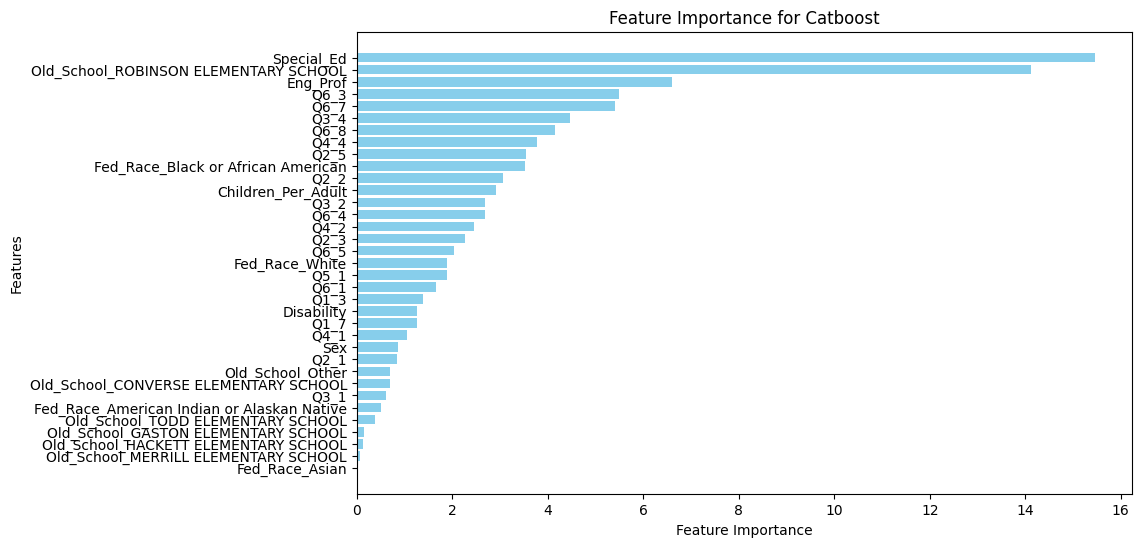

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Get feature names from the preprocessor
num_features = multi_target_model.named_steps['preprocessor'].transformers_[0][2]
cat_features = multi_target_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(input_features=categorical_features)

# Combine numerical and categorical feature names
feature_names = list(num_features) + list(cat_features)

# Get the feature importances from the first estimator of the MultiOutputRegressor
feature_importances_values = multi_target_model.named_steps['regressor'].estimators_[0].feature_importances_

# Create a DataFrame for easier handling and plotting
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_values})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # To show the highest importance at the top
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Catboost")
plt.show()

In [ ]:
from  sklearn.metrics import mean_absolute_error

y_pred = multi_target_model.predict(X_test)

mae_math = mean_absolute_error(y_test['Math 18-19'], y_pred[:, 0])
mae_read = mean_absolute_error(y_test['Read 18-19'], y_pred[:, 1])

print(f"MAE for Math 18-19: {mae_math}")
print(f"MAE for Read 18-19: {mae_read}")

# Calculate overall MAE (if you want an average MAE for both targets)
overall_mae = (mae_math + mae_read) / 2
print(f"Overall MAE: {overall_mae}")

MAE for Math 18-19: 12.06528905001325
MAE for Read 18-19: 15.90632055526097
Overall MAE: 13.98580480263711
